<a href="https://colab.research.google.com/github/SamahAliIriqat/Adult-Income/blob/main/Project2_Part2_SAMAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load the dataset**

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pd.set_option('display.max_columns',200)
pd.set_option("display.max_info_rows", 800)
pd.set_option('display.max_info_columns',800)

from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/03-Intermediate Machine Learning/project2/adult.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Basic EDA**

In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
educational-num,int64
marital-status,object
occupation,object
relationship,object
race,object
gender,object


In [ ]:
df.dtypes.value_counts()

,count
object,9
int64,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   age              int64 
 1   workclass        object
 2   fnlwgt           int64 
 3   education        object
 4   educational-num  int64 
 5   marital-status   object
 6   occupation       object
 7   relationship     object
 8   race             object
 9   gender           object
 10  capital-gain     int64 
 11  capital-loss     int64 
 12  hours-per-week   int64 
 13  native-country   object
 14  income           object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.isna().sum().sum()

0

In [ ]:
# Check for missing values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
null_values = df.isnull().sum()
print(null_values[null_values > 0])

Series([], dtype: int64)


In [ ]:
for column in df.select_dtypes(include=['category']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
# Updated column names to match the DataFrame
# Check column names in the DataFrame
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Use the column variable to select the column and calculate the mean
      df.fillna({column: df[column].mean()}, inplace=True)

**2. Define X and y, with "Diabetess_Risk" as the target vector (y)**





In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Check existing column names
print(df.columns)

# Assuming the actual categorical column is named 'workclass'
categorical_column_name = 'workclass'
le = LabelEncoder()
df[categorical_column_name] = le.fit_transform(df[categorical_column_name])

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


Available numerical columns: Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'capital-gain',
       'capital-loss', 'hours-per-week'],
      dtype='object')


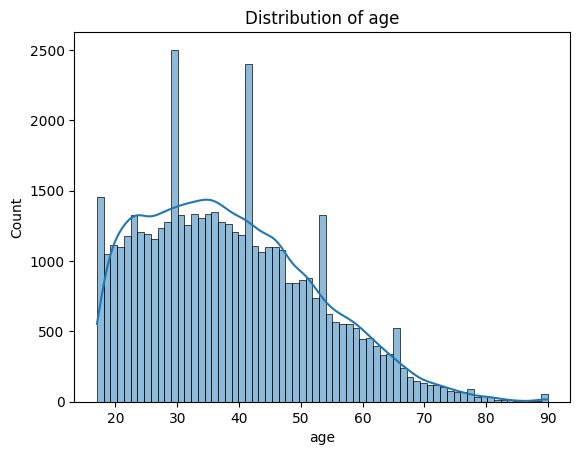

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the list of numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Print the available numerical columns to check for the correct name
print(f"Available numerical columns: {numerical_columns}")

# Choose the correct numerical column name from the list
chosen_column = 'age'

# Plot the distribution of the chosen feature
sns.histplot(df[chosen_column], kde=True)
plt.title(f'Distribution of {chosen_column}')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the list of numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Print the available numerical columns to check for the correct name
print(f"Available numerical columns: {numerical_columns}")

# Choose the correct numerical column name from the list
# For example, if the desired column is named 'age', replace 'numerical_feature' with 'age'
chosen_column = 'workclass' #

# Plot the distribution of the chosen feature
sns.histplot(df[chosen_column], kde=True)
plt.title(f'Distribution of {chosen_column}')
plt.show()

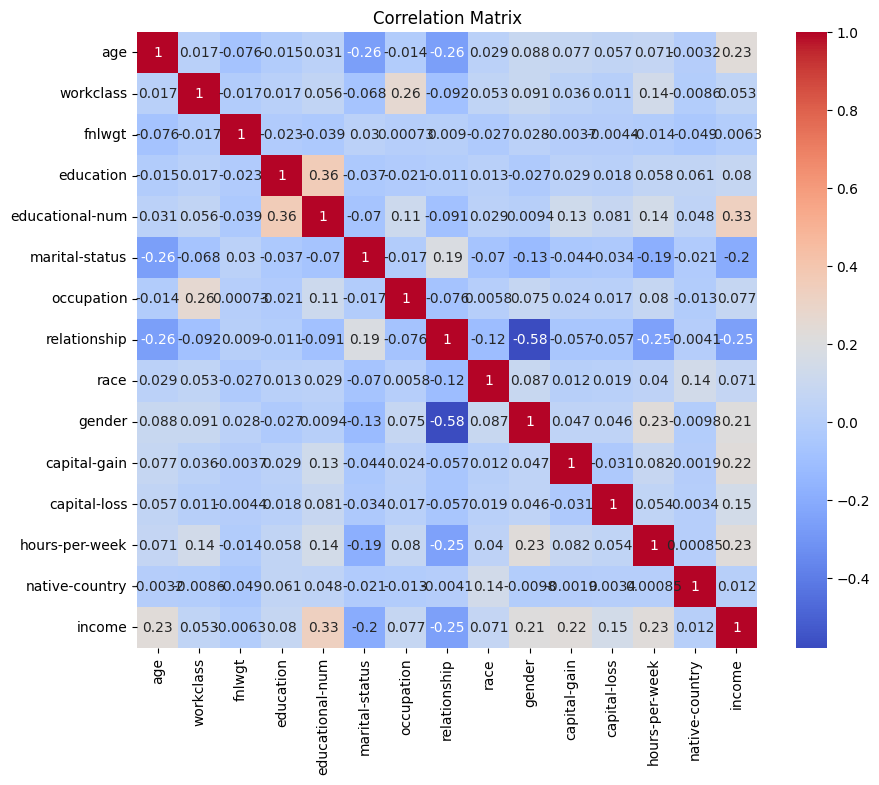

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'education' column to numerical representation using Label Encoding or One-Hot Encoding
# Assuming 'education' is the column with '11th' and other categorical values
for column in df.select_dtypes(include=['object']).columns:
    # Use Label Encoding
    df[column] = le.fit_transform(df[column])  # Indented this line

    # Or Use One-Hot Encoding if the categories are not ordinal
    # df = pd.get_dummies(df, columns=[column], prefix=[column])

# Removed duplicate for loop
# The original code had the same loop twice, which was unnecessary

plt.figure(figsize=(10, 8))
# Calculate correlation only for numerical features
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# **Replace 'target_column' with the actual name of your target column**
# For example, if your target column is named 'income', change the code to:
target_column_name = 'income'  # Replace 'income' with your actual target column name

# Define target and features
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.8597048575527773
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7440
           1       0.75      0.62      0.68      2318

    accuracy                           0.86      9758
   macro avg       0.82      0.78      0.79      9758
weighted avg       0.85      0.86      0.85      9758



capital-gain: 0.045623912375882945
educational-num: 0.023277715221619456
relationship: 0.022550926399836257
age: 0.01635786672126116
occupation: 0.011997133790562031
capital-loss: 0.009345890060395167
marital-status: 0.007984440577336504
hours-per-week: 0.007677346708977417
workclass: 0.002067765380284614
fnlwgt: 0.0017299621250896013


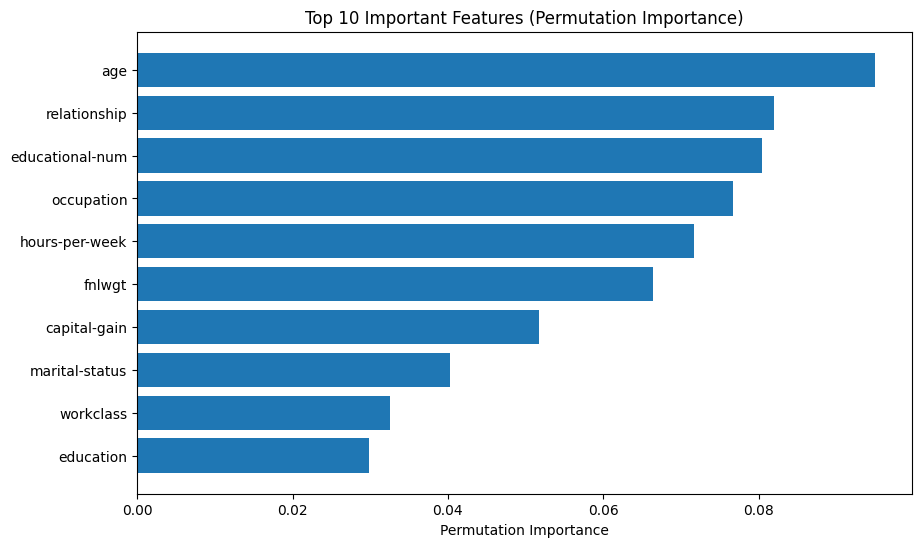

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Convert 'education' column to numerical representation using Label Encoding or One-Hot Encoding
# Assuming 'education' is the column with '11th' and other categorical values
for column in df.select_dtypes(include=['object']).columns:
    # Use Label Encoding
    df[column] = le.fit_transform(df[column])  # Indented this line

    # Or Use One-Hot Encoding if the categories are not ordinal
    # df = pd.get_dummies(df, columns=[column], prefix=[column])

# Removed duplicate for loop
# The original code had the same loop twice, which was unnecessary


# **Replace 'target_column' with the actual name of your target column**
# For example, if your target column is named 'income', change the code to:
target_column_name = 'income'  # Replace 'income' with your actual target column name

# Define target and features
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


from sklearn.inspection import permutation_importance
import numpy as np
#import pandas as pd # Assuming pandas has been imported in previous cells

# Get permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get top 10 important features
importances = perm_importance.importances_mean
indices = importances.argsort()[::-1][:10]

# Print top 10 features
for i in range(10):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")

# We compute permutation importance on the trained model
results = permutation_importance(model, X, y, n_repeats=10, random_state=42)

# Extract importance scores and feature names
importance = results.importances_mean
indices = np.argsort(importance)[::-1]

# Visualize the top 10 features
top_n = 10
top_indices = indices[:top_n]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importance[top_indices], align='center')
plt.yticks(range(top_n), [X.columns[i] for i in top_indices])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Important Features (Permutation Importance)')
plt.gca().invert_yaxis()

**Do these features make sense based on the business case?**

Yes, it make sence; for example capital-gain was the top features, and it affect the income, and the same for other features.

**Figure (1): Relationship between capital-gain and income**

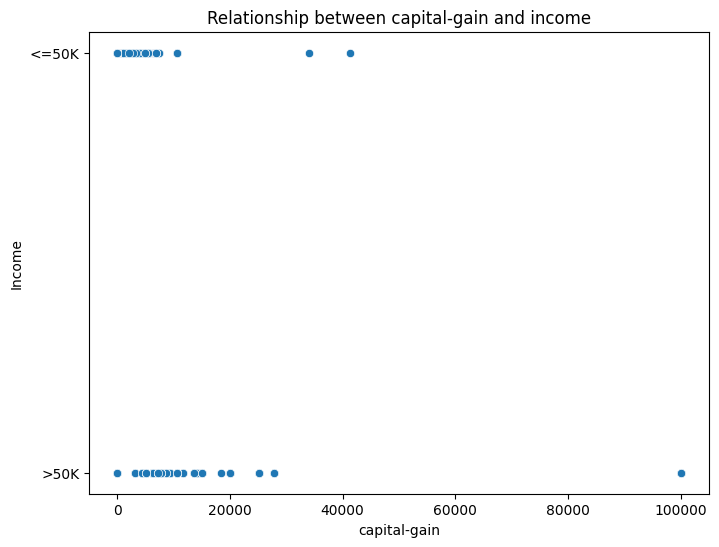

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming you have a dataframe called 'df' and 'income' is your target variable
# and 'capital-gain' is a feature column:

# Split the data into training and testing sets
X = df[['capital-gain']]  # Features
y = df['income']       # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 6))
# Access the 'capital-gain' column using string notation
sns.scatterplot(x=X_test['capital-gain'], y=y_test)
plt.title(f'Relationship between capital-gain and income')
plt.xlabel("capital-gain")
plt.ylabel('Income')
plt.show()

Figure (1) shows that the capital-gain was betwen 0 - 20000 in both categories (<=50, >50), but in category (<=50k) had some observations between  (20000 - 40000)

**Figure (2): Distribution of Income by Relationship**

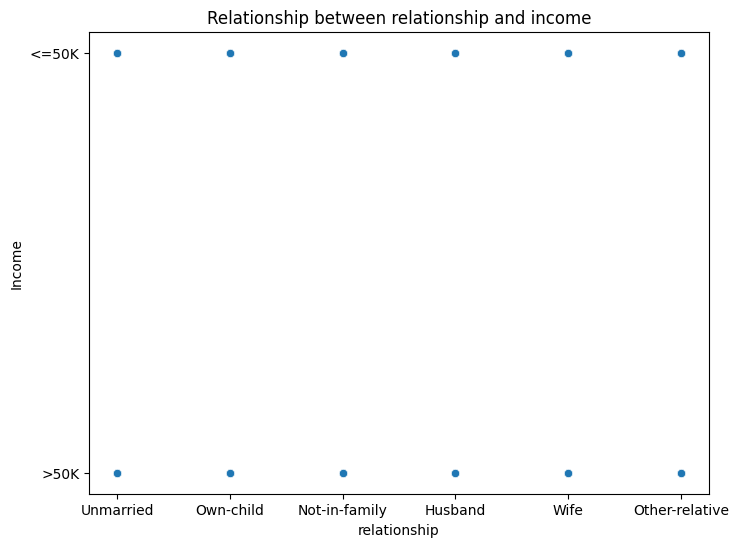

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming you have a dataframe called 'df' and 'income' is your target variable
# and 'relationship', 'capital-gain' are feature columns:

# Update X to include the 'relationship' column
X = df[['relationship', 'capital-gain']]  # Features
y = df['income']       # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['relationship'], y=y_test)
plt.title(f'Relationship between relationship and income')
plt.xlabel("relationship")
plt.ylabel('Income')
plt.show()

Figure (2) shows that the realtionship categories has approximately thesame  distribution in both categories (<=50, >50), but in category (<=50k) had some observations between  (20000 - 40000)

In [ ]:
# import pandas as pd
# Define target and cols to drop
target_col = 'Income'
drop_cols = []

# Print the columns in the DataFrame to verify the existence of the 'Income' column
print(df.columns)

# Check if 'Income' is present in the columns; if not, try alternative names
if target_col not in df.columns:
    # Possible alternatives for 'Income' column
    alternative_names = ['income', 'earnings', 'salary']

    # Check if any alternative name is present in the columns
    for name in alternative_names:
        if name in df.columns:
            target_col = name
            print(f"Using alternative target column: '{target_col}'")
            break
    else:
        raise KeyError(f"Target column '{target_col}' and alternatives not found in DataFrame.")

# Define X and y
y = df[target_col].copy()
X = df.drop(columns=[target_col, *drop_cols]).copy()

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
Using alternative target column: 'income'


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=321)
X_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
22941,43,4,124692,9,13,2,12,0,4,1,0,0,40,39
14212,42,6,116197,11,9,2,3,0,4,1,0,0,40,39
22859,51,4,125796,1,7,5,8,1,2,0,0,0,40,23
32414,25,2,198813,9,13,4,1,2,2,0,0,0,40,39
42201,24,4,278130,8,11,4,7,1,4,1,0,0,40,39


# PCA

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_tf = scaler.fit_transform(X_train)
X_test_tf = scaler.transform(X_test)

In [ ]:
# Check for class balance of target
y_train.value_counts(1)

,proportion
income,
0,0.762762
1,0.237238


In [ ]:
!pip install imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X_train_tf = imputer.fit_transform(X_train_tf)
X_test_tf = imputer.transform(X_test_tf)

# Now apply SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train_tf, y_train)
y_train_sm.value_counts()

,count
income,
1,27911
0,27911


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27911
           1       1.00      1.00      1.00     27911

    accuracy                           1.00     55822
   macro avg       1.00      1.00      1.00     55822
weighted avg       1.00      1.00      1.00     55822



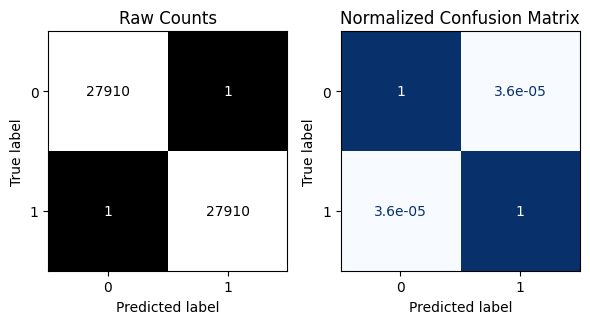


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      9198
           1       0.69      0.69      0.69      3000

    accuracy                           0.85     12198
   macro avg       0.79      0.79      0.79     12198
weighted avg       0.85      0.85      0.85     12198



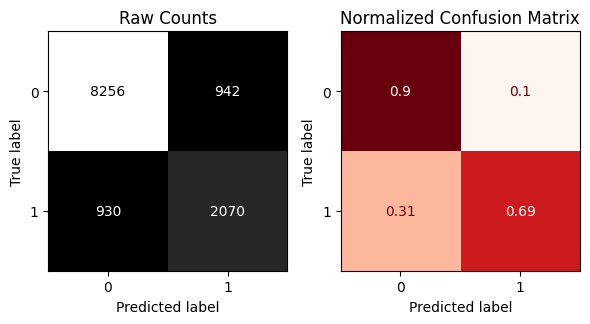

Training time was: 0:00:19.177465


In [ ]:
# Import datetime library
import datetime as dt

# Record the start time
start = dt.datetime.now()

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_sm, y_train_sm)

# Record the end time and calc duration
end = dt.datetime.now()
dur_baseline = end-start

evaluate_classification(clf, X_train_sm,y_train_sm, X_test_tf, y_test)
print(f'Training time was: {dur_baseline}')

In [ ]:
# Instantiate & fit data using PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_sm)
X_test_pca = pca.transform(X_test_tf)
X_train_pca.head()

,pca0,pca1,pca2
0,0.593707,-0.974221,-0.413680
1,0.162514,-0.777065,-0.775591
2,-1.451151,1.161107,-0.554298
3,-1.472292,1.706717,0.572328
4,-0.452338,0.011408,-0.445445


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27911
           1       1.00      1.00      1.00     27911

    accuracy                           1.00     55822
   macro avg       1.00      1.00      1.00     55822
weighted avg       1.00      1.00      1.00     55822



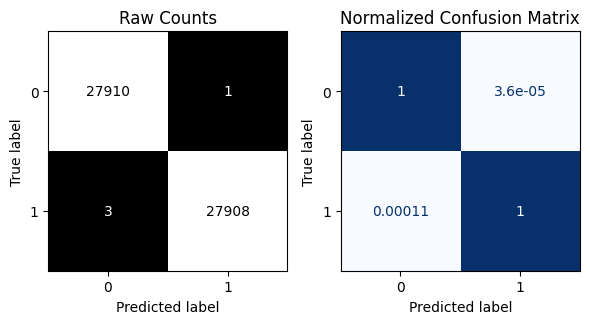


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9198
           1       0.53      0.76      0.63      3000

    accuracy                           0.78     12198
   macro avg       0.72      0.77      0.73     12198
weighted avg       0.82      0.78      0.79     12198



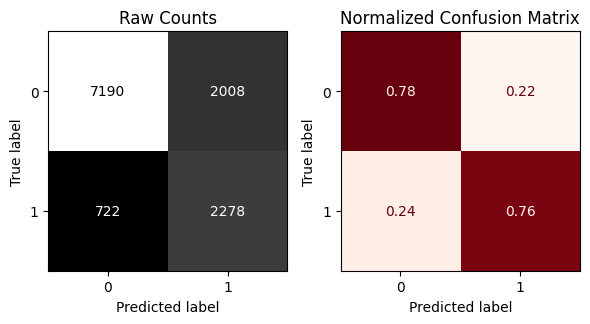

Training time was: 0:00:13.242759


In [ ]:
# Record the start time
start = dt.datetime.now()

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train_sm)

# Record the end time and calc duration
end = dt.datetime.now()
dur_pca = end-start

evaluate_classification(clf, X_train_pca,y_train_sm, X_test_pca, y_test)
print(f'Training time was: {dur_pca}')

In [ ]:
target = ['income']
for col in target:
    print(f'\n- {col}:')
    # Use df[col].value_counts() to count values in the DataFrame column
    print(df[col].value_counts())


- income:
income
<=50K    37155
>50K     11687
Name: count, dtype: int64


<Axes: >

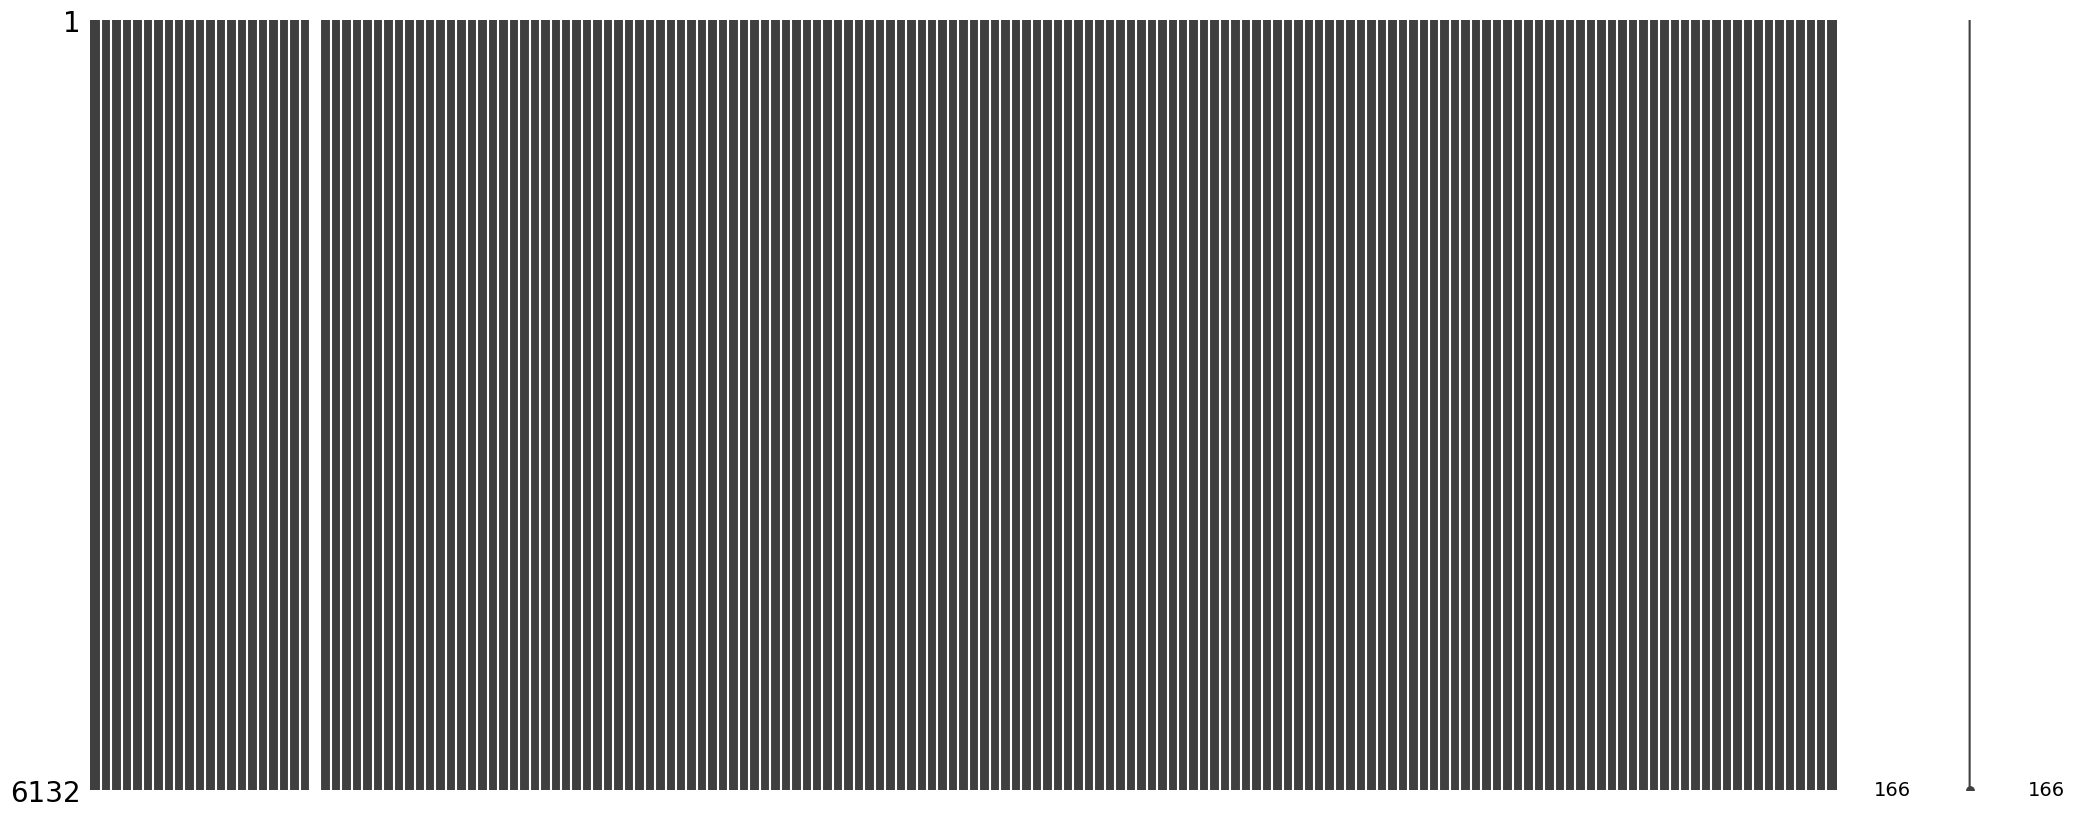

In [ ]:
import missingno as msno
msno.matrix(X)

In [ ]:
# Fill in nulls with 0 and verify all nulls are addressed
X = X.fillna(0)
X.isna().sum().sum()

0

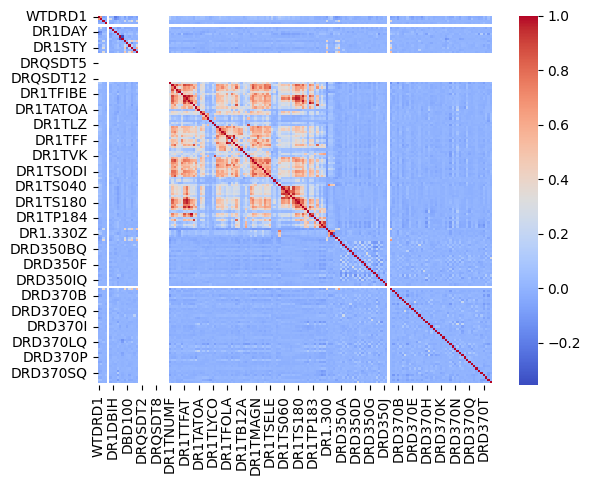

In [ ]:
# Calculating the correlation matrix and plotting
corr = scaled_df.corr()
sns.heatmap(corr, cmap='coolwarm');

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")
    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict


def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
    # Get predictions for training data
    y_train_pred = model.predict(X_train)
    # Call the helper function to obtain regression metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = model.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
    if output_dict == True:
        # Store results in a dataframe if ouput_frame is True
        return {'train':results_train,
                    'test': results_test}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

np.random.seed(42)
random_features = np.random.choice(scaled_df.columns,3)
# plot thee randomly selected features
sns.pairplot(scaled_df,  vars=random_features);
sns.pairplot(scaled_df,  vars=random_features);

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


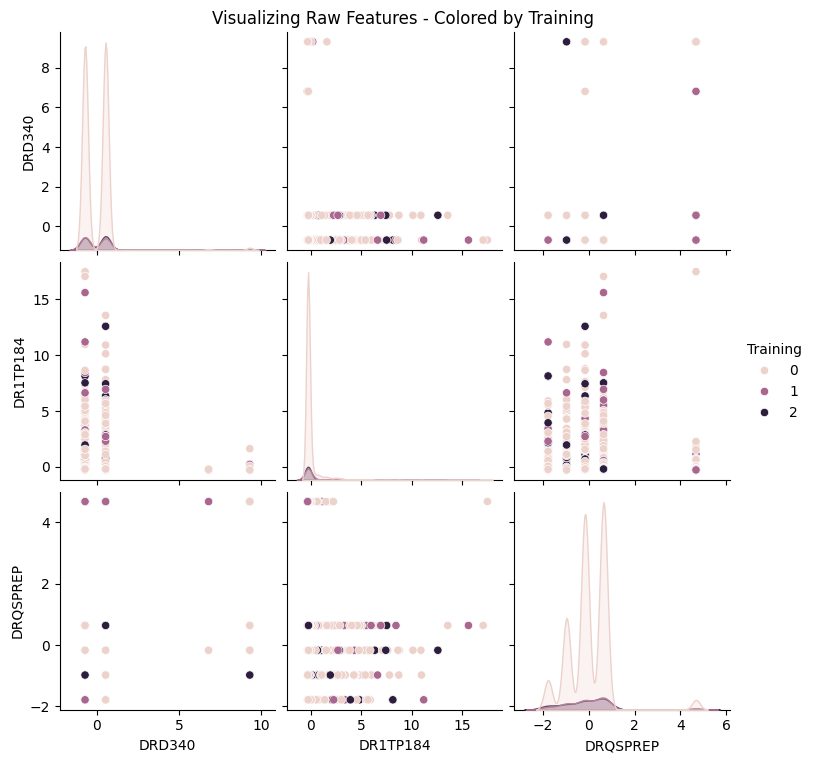

In [ ]:
# Concatenate scaled features with target
# Rename the target column to 'Training' for visualization purposes
plot_df = pd.concat([scaled_df, df[target].rename('Training')], axis=1)

# Plot with color coding based on target
g = sns.pairplot(data=plot_df,  vars=random_features, hue='Training')
g.fig.suptitle('Visualizing Raw Features - Colored by Training', y=1.01);

In [ ]:
# Import necessary library
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.decomposition import PCA
# Import SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file after mounting the drive
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/03-Intermediate Machine Learning/week09/NHANES_Diet_Diabetes_Risk.csv')

# Define X and y
target = "Diabetes_Risk"
X = df.drop(columns = [target])
y = df[target]

# Option 1: Impute missing values with the mean of each column
# Instantiate SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')
# Fit and transform the imputer on your data
X_imputed = imputer.fit_transform(X)

# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X_imputed)
scaled_df.head()

# Instantiate PCA to make 3 principal components
pca = PCA(n_components=3)
# Create and define the principal components
principal_components = pca.fit_transform(scaled_df) #
# Preview the results
principal_components.head()

# Remove the redundant/erroneous part of the code that operates on the raw X DataFrame:

# Option 2: Drop rows with missing values (use with caution, may lose data)
# This removes any rows containing NaNs across all columns
# df.dropna(inplace=True)

# Define X and y after dropping rows
# X = df.drop(columns = [target])
# y = df[target]


# Instantiate Standard Scaler
# scaler = StandardScaler() # This was causing the issue, as it was using the original X with NaNs
# Fit & transform data.
# scaled_df = scaler.fit_transform(X) # This was using the original X with NaNs
# scaled_df.head()



# Instantiate PCA to make 3 principal components
# pca = PCA(n_components=3)
# Create and define the principal components
# principal_components = pca.fit_transform(scaled_df)
# Preview the results
# principal_components.head()



Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['DRQSDT5']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


,pca0,pca1,pca2
0,-3.607439,0.232701,-0.281780
1,18.502999,-3.806594,5.536878
2,-1.394520,0.344493,-1.610303
3,-2.106833,-2.776169,-2.943797
4,-0.331545,-0.437327,0.759293


In [ ]:
# Import necessary library
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.decomposition import PCA
# Import SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file after mounting the drive
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/03-Intermediate Machine Learning/week09/NHANES_Diet_Diabetes_Risk.csv')

# Define X and y
target = "Diabetes_Risk"
X = df.drop(columns = [target])
y = df[target]

# Option 1: Impute missing values with the mean of each column
# Instantiate SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')
# Fit and transform the imputer on your data
X_imputed = imputer.fit_transform(X)

# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X_imputed) # Use imputed data here
scaled_df.head()

# Instantiate PCA to make 3 principal components
pca = PCA(n_components=3)
# Create and define the principal components
principal_components = pca.fit_transform(scaled_df) # Use imputed and scaled data here
# Preview the results
principal_components.head()

# Remove the redundant/erroneous part of the code that operates on the raw X DataFrame:

# Option 2: Drop rows with missing values (use with caution, may lose data)
# This removes any rows containing NaNs across all columns
# df.dropna(inplace=True)

# Define X and y after dropping rows
# X = df.drop(columns = [target])
# y = df[target]


# Instantiate Standard Scaler
# scaler = StandardScaler() # This was causing the issue, as it was using the original X with NaNs
# Fit & transform data.
# scaled_df = scaler.fit_transform(X) # This was using the original X with NaNs
# scaled_df.head()



# Instantiate PCA to make 3 principal components
# pca = PCA(n_components=3)
# Create and define the principal components
# principal_components = pca.fit_transform(scaled_df)
# Preview the results
# principal_components.head()

# Variance explained by each PC
pca.explained_variance_ratio_

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['DRQSDT5']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


array([0.15860057, 0.03569877, 0.0309019 ])

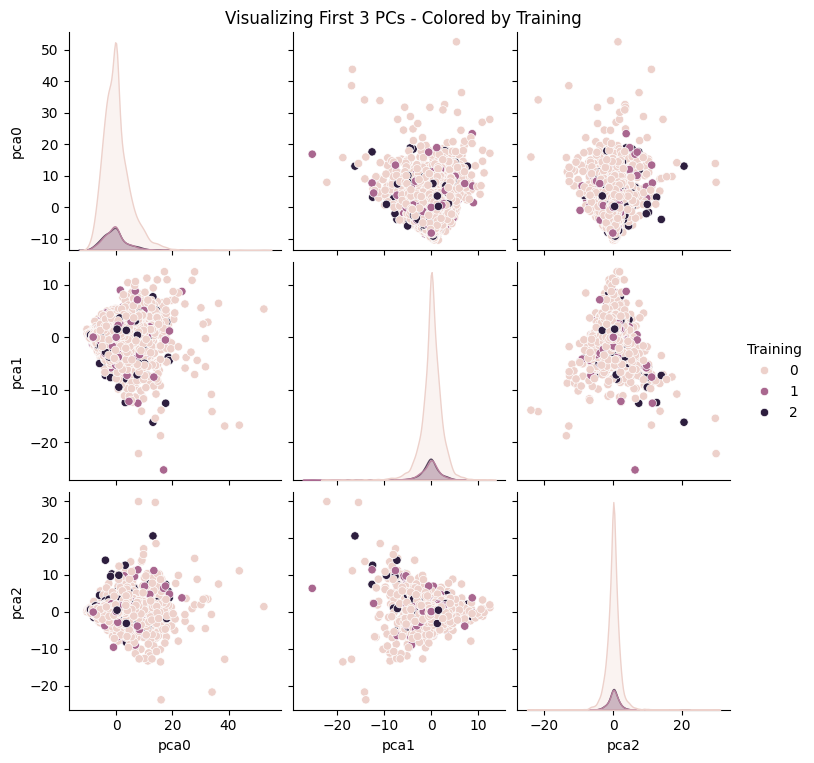

In [ ]:
# Import necessary library
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.decomposition import PCA
# Import SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer
# Import necessary library
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.decomposition import PCA
# Import SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns', None) # Corrected line

# Concatenate principal components with target
plot_df_pca = pd.concat([principal_components, df[target]], axis=1)

# Rename the target column to 'Training' before plotting
plot_df_pca = plot_df_pca.rename(columns={target: 'Training'}) # This line is added

# Plot with color coding based on target
g_pca = sns.pairplot(data=plot_df_pca,  vars=principal_components.columns, hue='Training')
g_pca.fig.suptitle('Visualizing First 3 PCs - Colored by Training', y=1.01);


In [ ]:
# Compare speeds before and after PCA
compare_speed = dur_baseline/dur_pca
print(f"Using PCs was {compare_speed:.2f} times faster!")

Using PCs was 5.05 times faster!


In [ ]:
# Initialize and fit PCA
pca = PCA()
pca.fit(X_train_sm, y_train)

PCA()

In [ ]:
# Determine how much variance is explained by each PC
explained = pd.Series(pca.explained_variance_ratio_, name='Explained Variance Ratio')
explained

,Explained Variance Ratio
0,0.228441
1,0.055955
2,0.042910
3,0.033399
4,0.031629
...,...
162,0.000000
163,0.000000
164,0.000000
165,0.000000


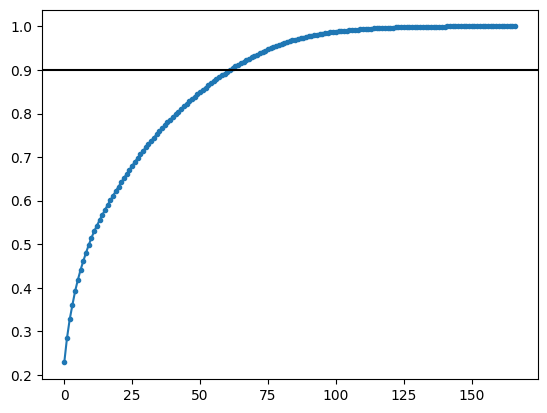

In [ ]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
ax = explained.cumsum().plot(marker='.')
# add a line to mark .9 (or 90%) variance explained
ax.axhline(.9, color='k');

In [ ]:
# Define PCA to address 85% of the variance
pca85 = PCA(n_components=.85)
# fit and transform on training data
X_train_pca85 = pca85.fit_transform(X_train_sm)
# transform test data
X_test_pca85 = pca85.transform(X_test_tf)
# obtain the number of PCs used
pca85.n_components_

52

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4106
           1       1.00      1.00      1.00      4106
           2       1.00      1.00      1.00      4106

    accuracy                           1.00     12318
   macro avg       1.00      1.00      1.00     12318
weighted avg       1.00      1.00      1.00     12318



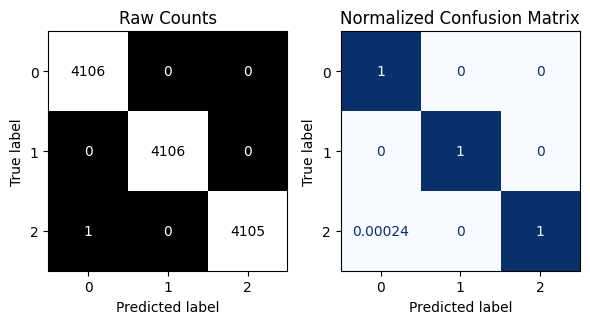


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1346
           1       0.15      0.08      0.11       157
           2       0.15      0.10      0.12       158

    accuracy                           0.75      1661
   macro avg       0.38      0.36      0.36      1661
weighted avg       0.70      0.75      0.72      1661



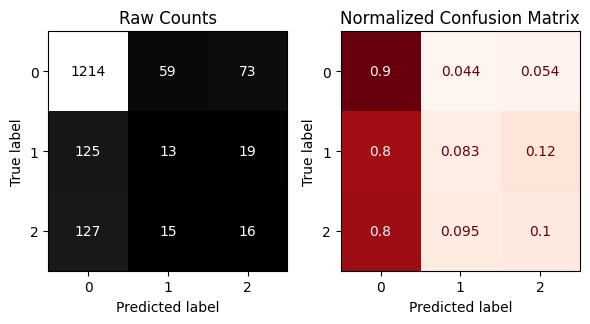

Training time was: 0:00:23.775726


In [ ]:
# Record the start time
start = dt.datetime.now()

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca85, y_train_sm)

# Record the end time and calc duration
end = dt.datetime.now()
dur_pca_85 = end-start

evaluate_classification(clf, X_train_pca85,y_train_sm, X_test_pca85, y_test)
print(f'Training time was: {dur_pca_85}')

In [ ]:
compare_speed = dur_baseline/dur_pca_85
print(f"Using PC's with .85 was {compare_speed:.2f} times faster!")

Using PC's with .85 was 1.16 times faster!


capital-gain: 0.045623912375882945
educational-num: 0.023277715221619456
relationship: 0.022550926399836257
age: 0.01635786672126116
occupation: 0.011997133790562031
capital-loss: 0.009345890060395167
marital-status: 0.007984440577336504
hours-per-week: 0.007677346708977417
workclass: 0.002067765380284614
fnlwgt: 0.0017299621250896013


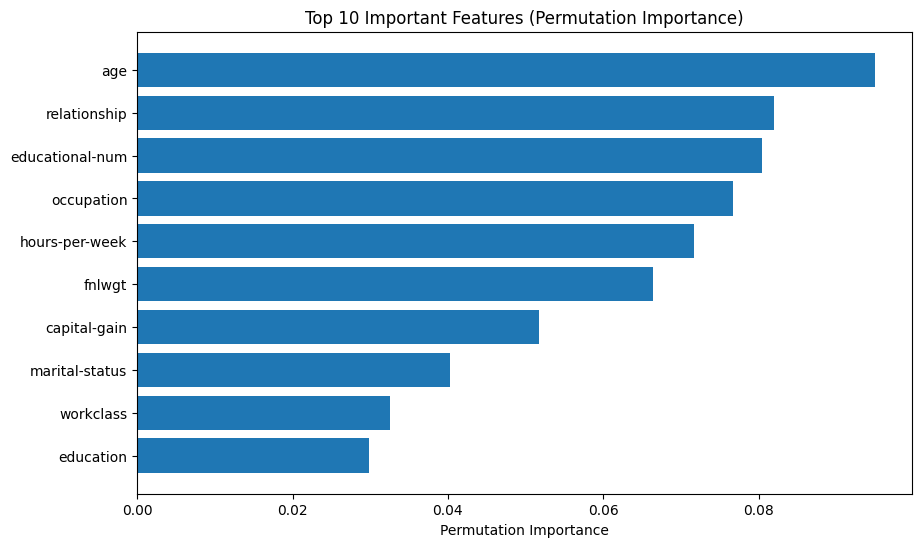

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Convert 'education' column to numerical representation using Label Encoding or One-Hot Encoding
# Assuming 'education' is the column with '11th' and other categorical values
for column in df.select_dtypes(include=['object']).columns:
    # Use Label Encoding
    df[column] = le.fit_transform(df[column])

    # Or Use One-Hot Encoding if the categories are not ordinal
    # df = pd.get_dummies(df, columns=[column], prefix=[column])


target_column_name = 'income'
# Define target and features
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


from sklearn.inspection import permutation_importance
import numpy as np
#import pandas as pd # Assuming pandas has been imported in previous cells

# Get permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get top 10 important features
importances = perm_importance.importances_mean
indices = importances.argsort()[::-1][:10]

# Print top 10 features
for i in range(10):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")

# We compute permutation importance on the trained model
results = permutation_importance(model, X, y, n_repeats=10, random_state=42)

# Extract importance scores and feature names
importance = results.importances_mean
indices = np.argsort(importance)[::-1]  # Sort in descending order

# Visualize the top 10 features
top_n = 10
top_indices = indices[:top_n]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importance[top_indices], align='center')
plt.yticks(range(top_n), [X.columns[i] for i in top_indices])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Important Features (Permutation Importance)')
plt.gca().invert_yaxis()
plt.show()

هىفاهس ةخيم

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.995129,0.088484,0.351675,-2.397350,-1.197259,0.916138,0.099824,0.971649,-1.971746,0.70422,-0.144804,-0.217127,-0.034087,0.289462,-0.560845
1,-0.046942,0.088484,-0.945524,0.183660,-0.419335,-0.410397,-0.372938,-0.900852,0.392384,0.70422,-0.144804,-0.217127,0.772930,0.289462,-0.560845
2,-0.776316,-1.277432,1.394723,-0.848744,0.747550,-0.410397,1.045346,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-0.034087,0.289462,1.783024
3,0.390683,0.088484,-0.277844,1.216063,-0.030373,-0.410397,0.099824,-0.900852,-1.971746,0.70422,0.886874,-0.217127,-0.034087,0.289462,1.783024
4,-1.505691,-2.643348,-0.815954,1.216063,-0.030373,0.916138,-1.554840,0.971649,0.392384,-1.42001,-0.144804,-0.217127,-0.841104,0.289462,-0.560845


In [ ]:
# Standardize the data (important for KMeans)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week']])

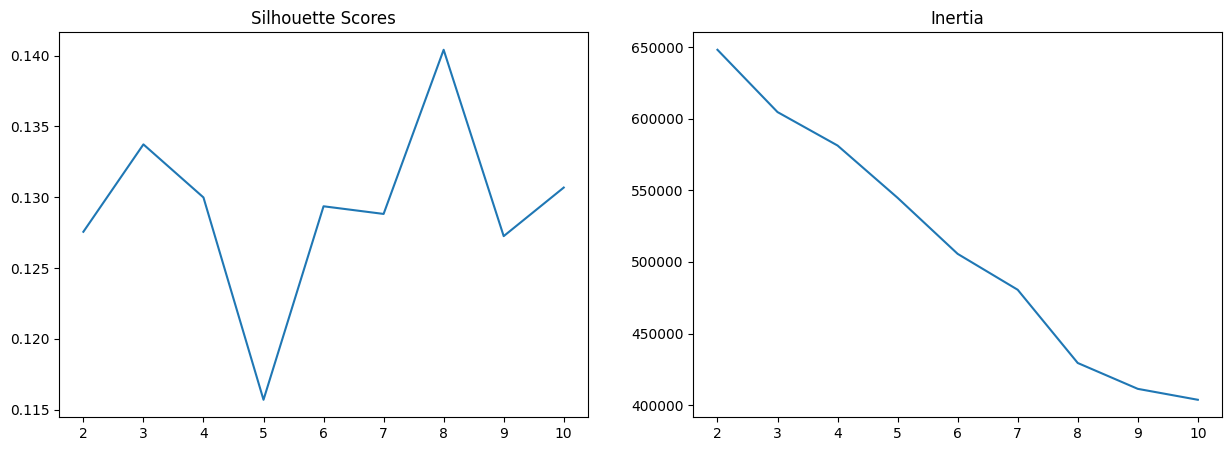

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
!pip install scikit-learn
#Import the silhouette_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [ ]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, n_init= 'auto', random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0,2
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0,1
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0,3


In [ ]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups
cluster_groups

,cluster,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,32.854759,4.131371,191937.557510,11.626917,10.464028,3.297361,6.774639,2.659788,3.561344,0.349741,301.541216,44.418922,37.030277,36.906631,0.071775
1,1,43.090518,4.254509,185207.367740,11.229058,11.060959,1.924403,7.395080,0.286335,3.800217,0.954009,2093.199688,137.765275,45.518085,37.085749,0.454103
2,2,38.294159,4.113862,201828.130427,2.529904,5.602267,2.871316,7.115083,1.602790,3.624586,0.702528,225.515257,50.098867,37.011334,34.676373,0.054403
3,3,41.147150,0.493918,185920.624851,10.487479,9.603148,2.909850,0.881231,1.922967,3.511328,0.528023,413.206058,67.031720,33.698784,37.220367,0.115669


IndexError: index 12 is out of bounds for axis 0 with size 12

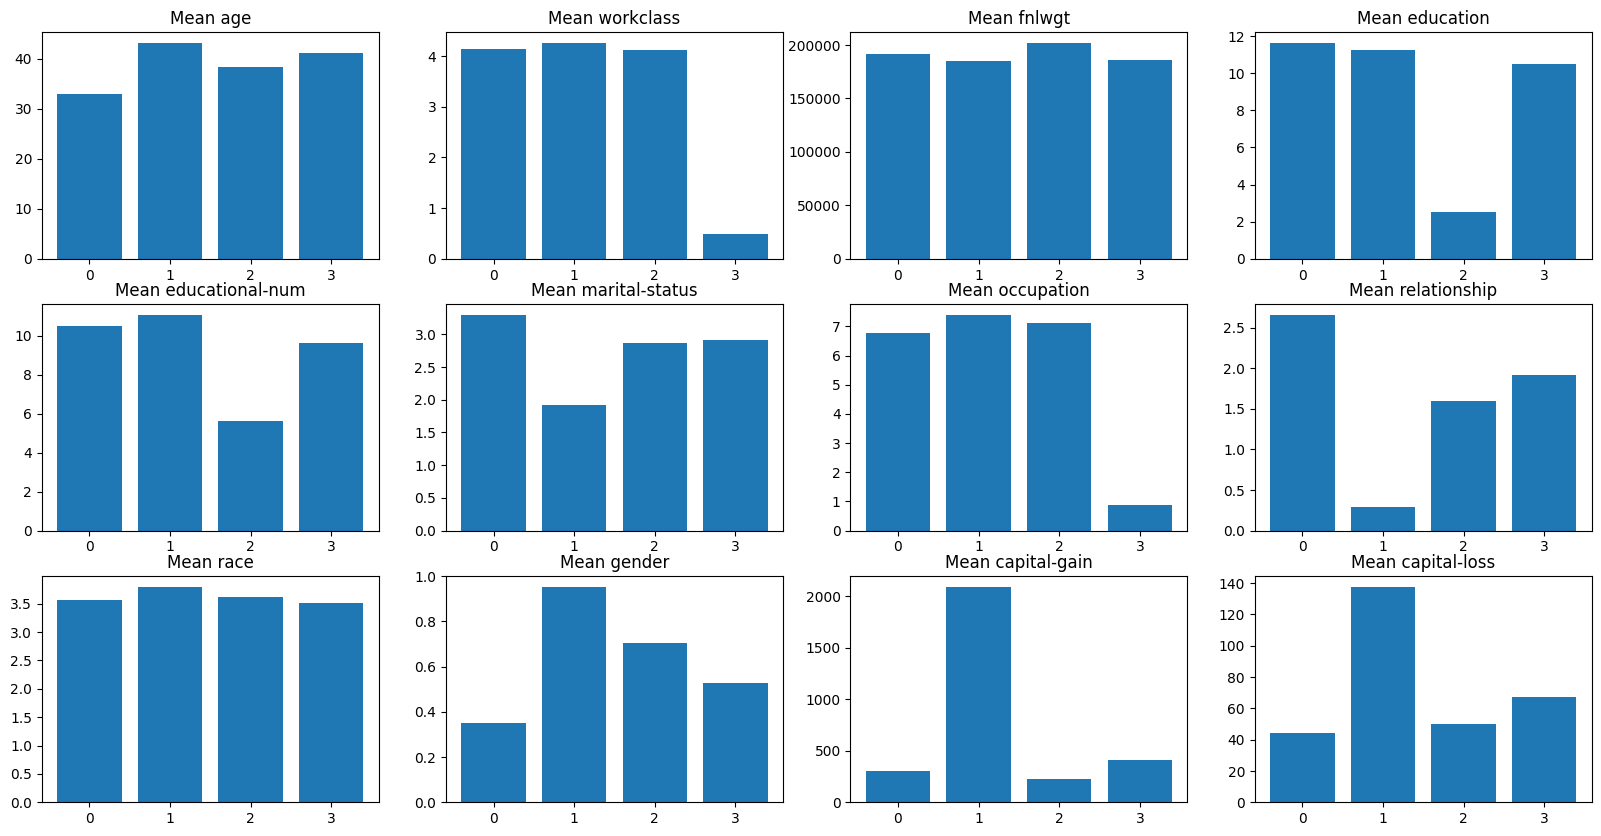

In [ ]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

In [ ]:
df.loc[df['cluster']==1].index

Index([    1,     2,     3,     7,    10,    14,    15,    19,    20,    24,
       ...
       48804, 48813, 48814, 48817, 48828, 48829, 48831, 48833, 48835, 48838],
      dtype='int64', length=21178)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Elbow Method to determine the optimal number of clusters
inertia = []
silhouette_scores = []

for k in range(2, 11):  # Trying clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)


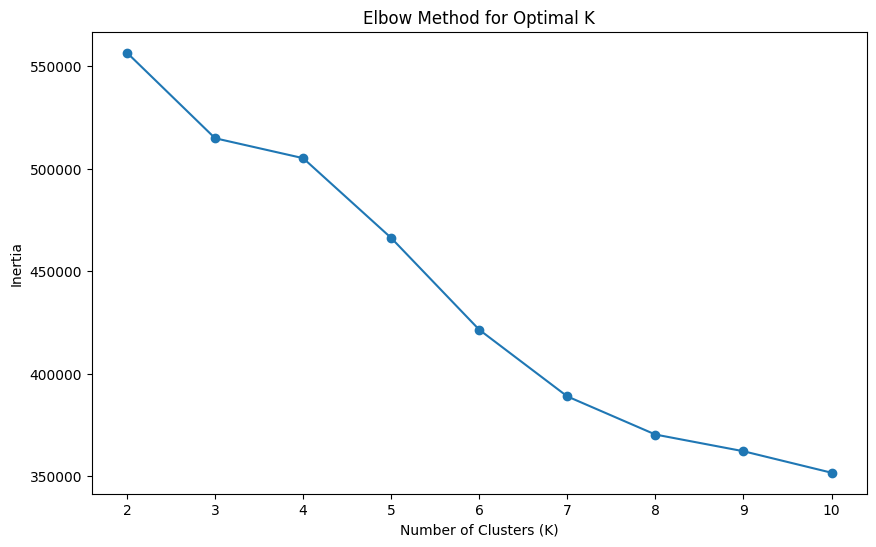

In [ ]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

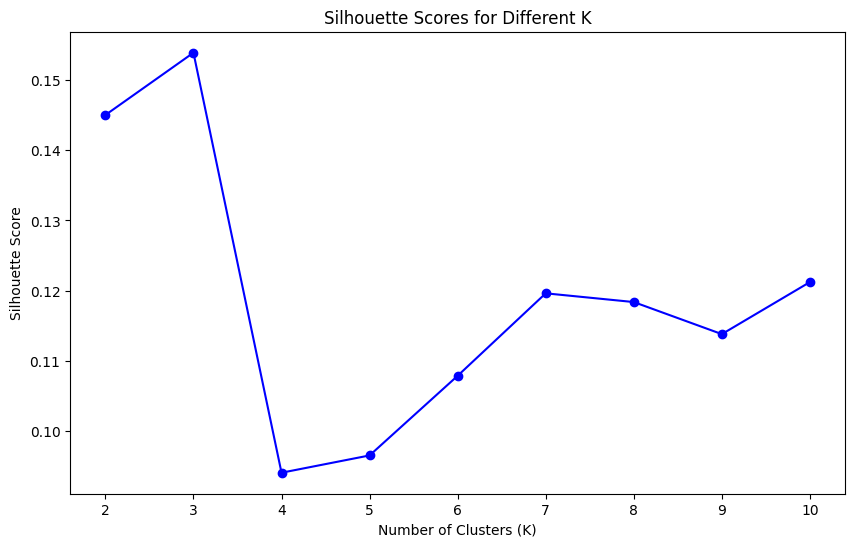

In [ ]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='b')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
# Fit the KMeans model with the chosen number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


In [ ]:
# Analyze Clusters
# Summary statistics for each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

               age  workclass         fnlwgt  education  educational-num  \
Cluster                                                                    
0        32.510573   4.113269  191372.471905  10.333274         9.853588   
1        42.470857   4.167758  185988.632542  11.192365        11.815601   
2        41.490918   0.478342  186048.783419  10.418491         9.626456   
3        41.470897   4.316637  191883.547994   9.438635         8.993082   

         marital-status  occupation  relationship      race    gender  \
Cluster                                                                 
0              3.431219    6.914410      2.972796  3.530055  0.267047   
1              2.126272   10.285196      0.424876  3.772774  0.927281   
2              2.902888    0.939683      1.871216  3.518165  0.543782   
3              2.043039    4.684095      0.467039  3.777090  0.935409   

         capital-gain  capital-loss  hours-per-week  native-country    income  \
Cluster                

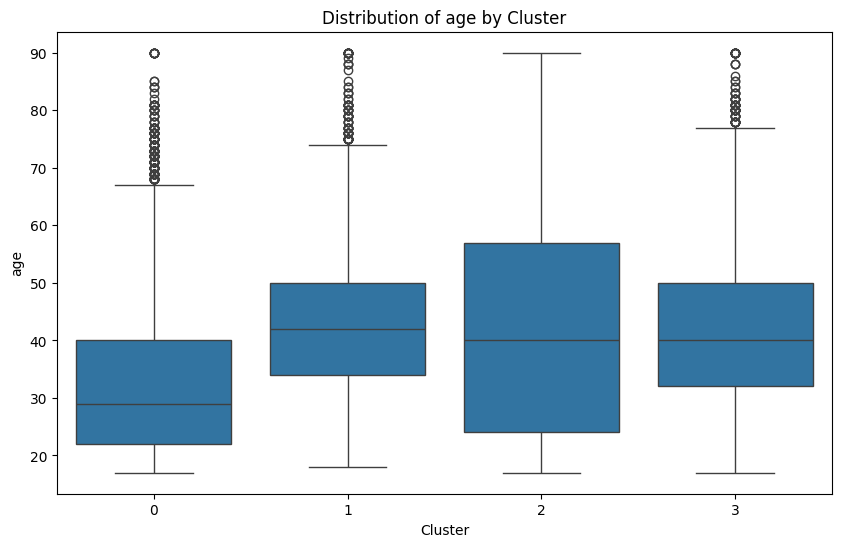

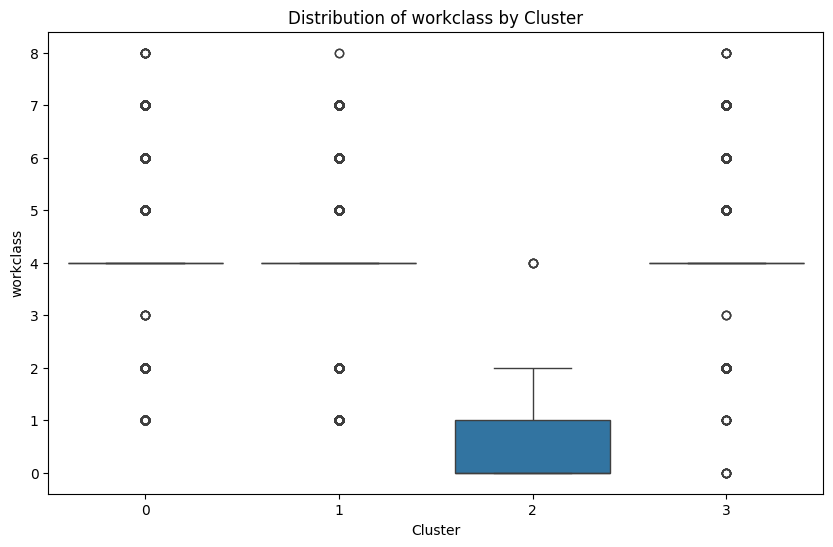

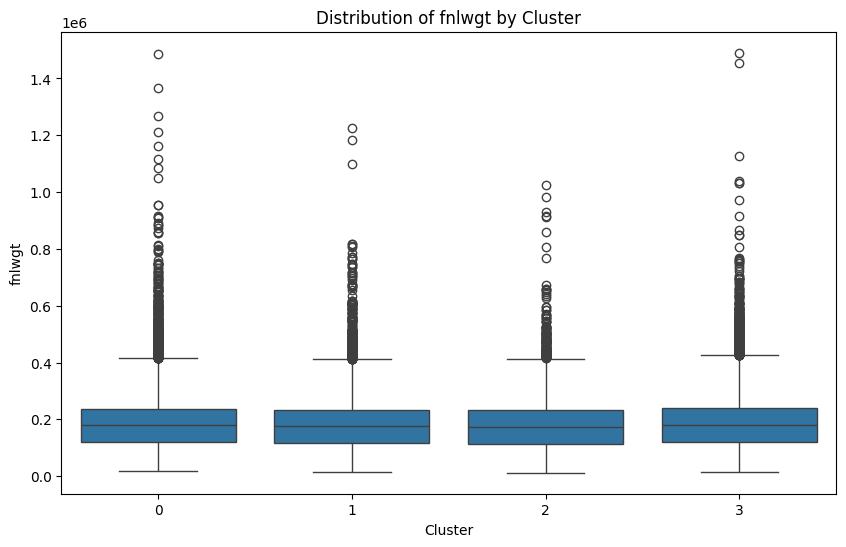

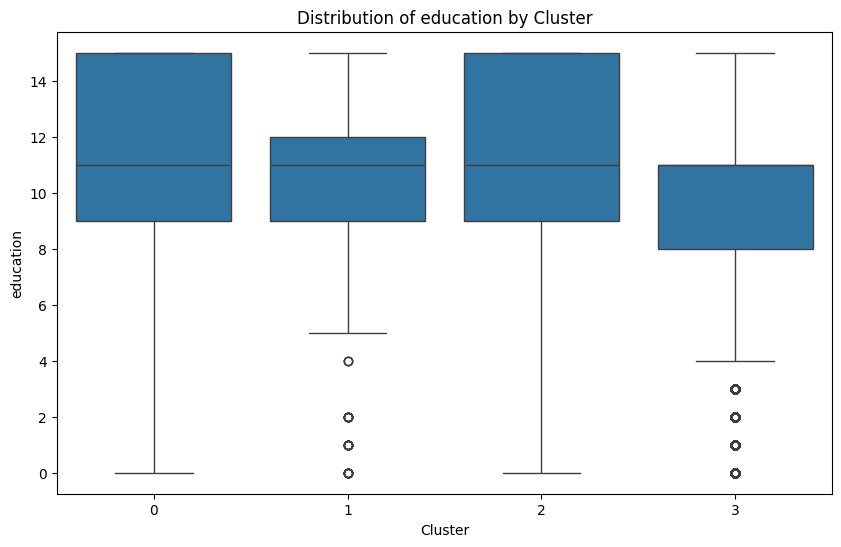

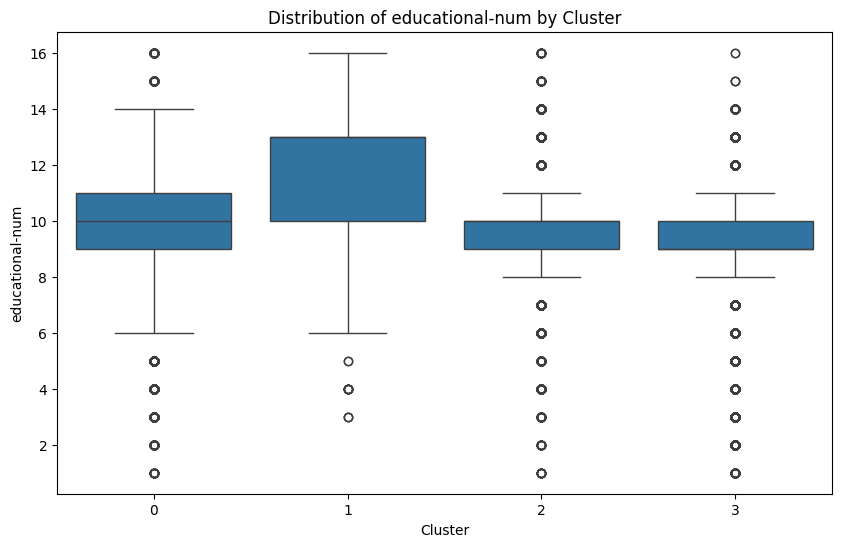

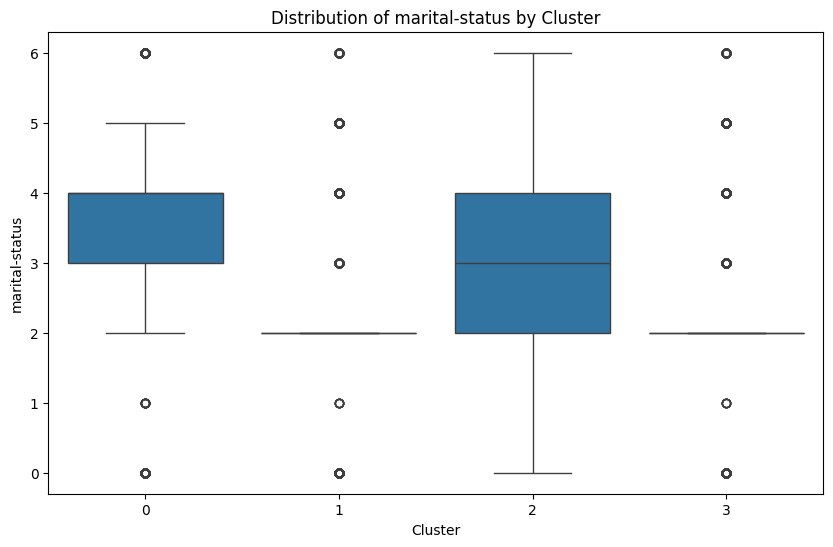

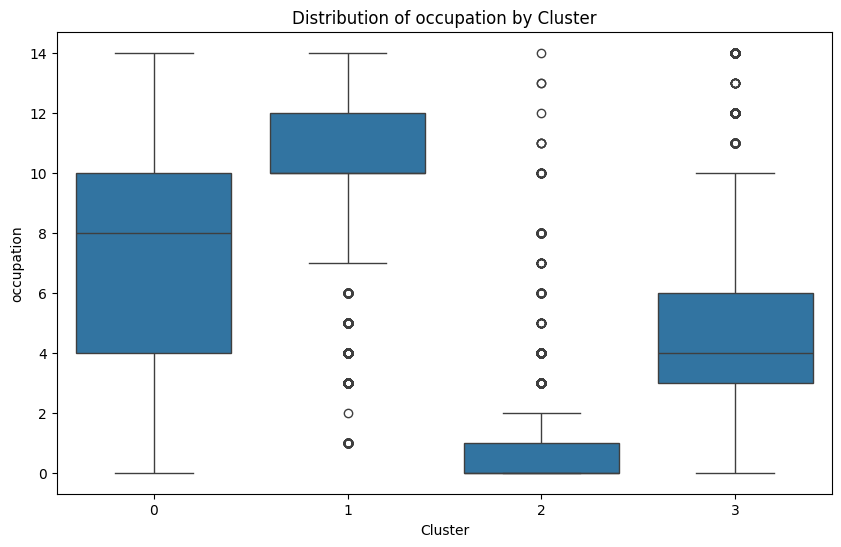

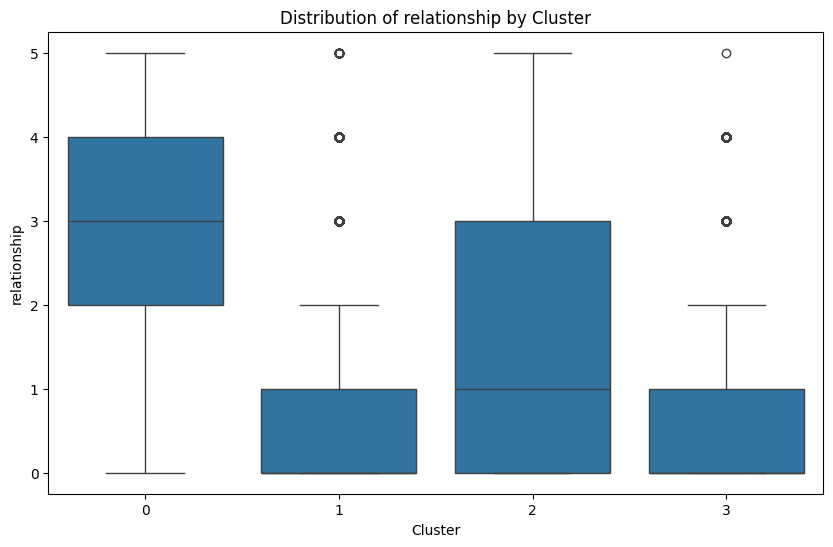

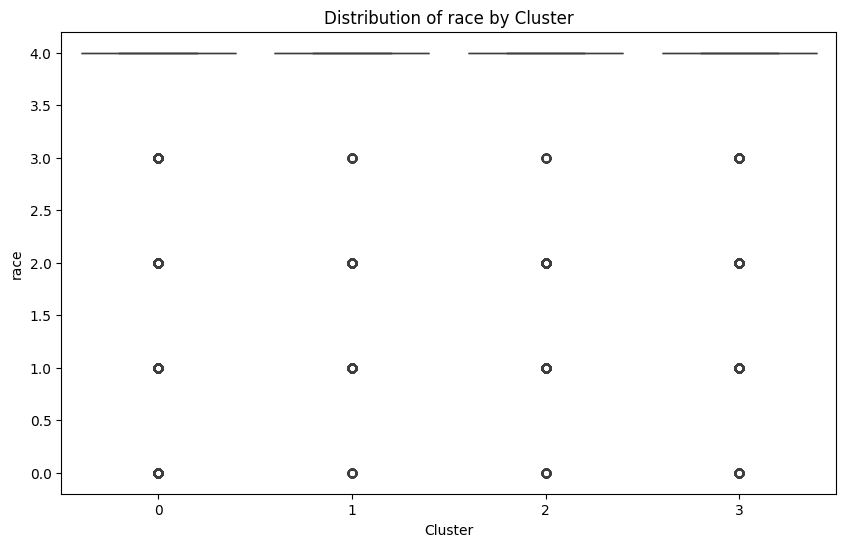

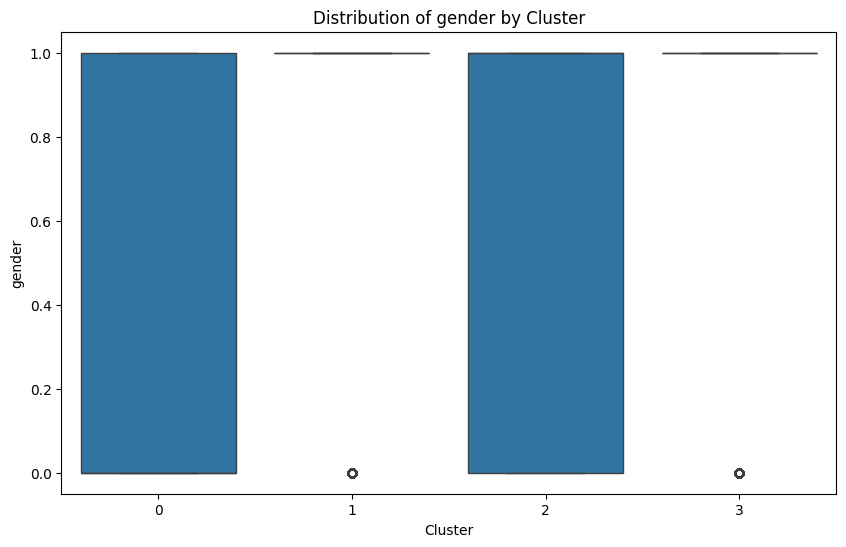

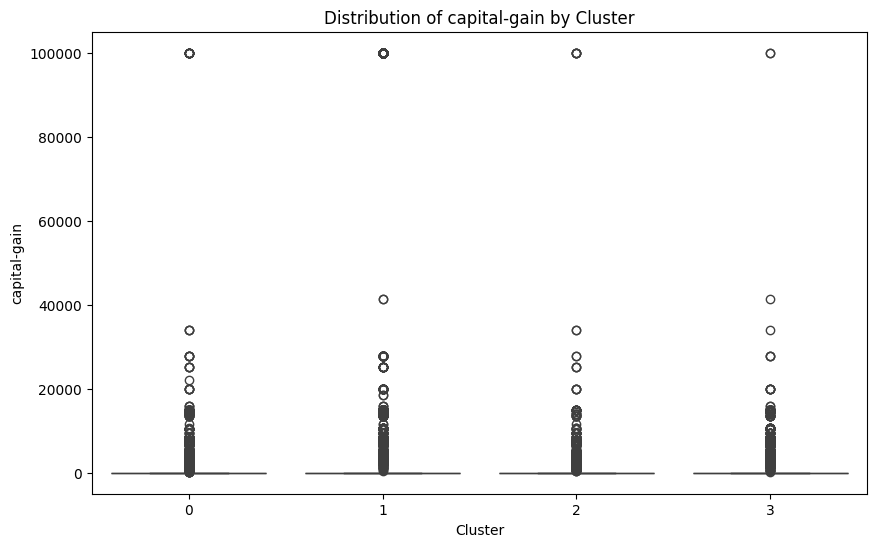

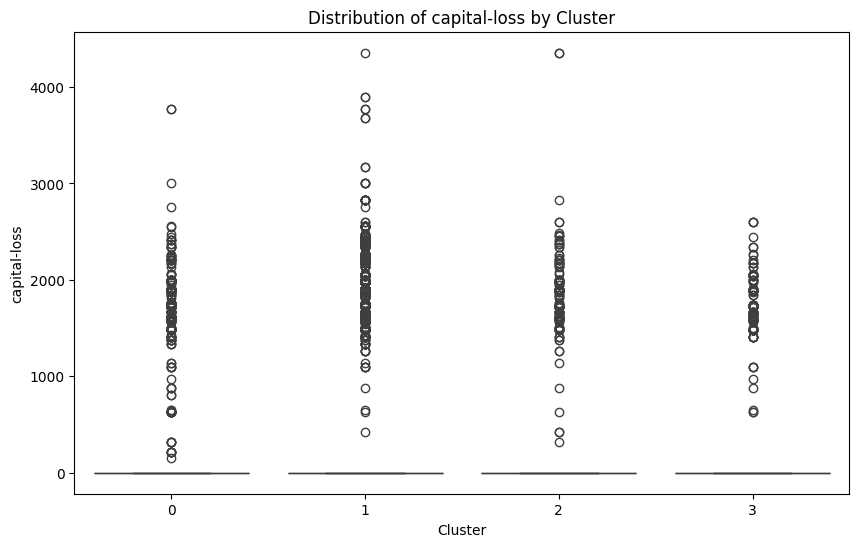

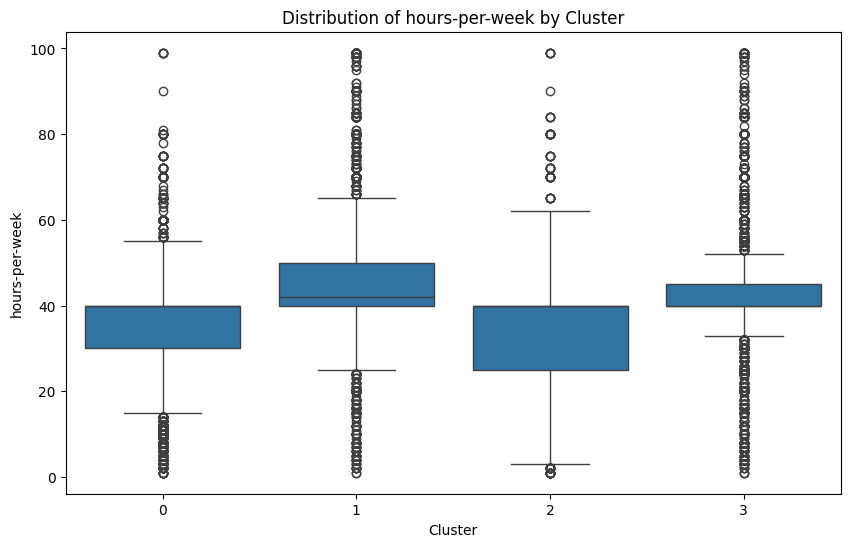

In [ ]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# isualize the distribution of each feature by cluster
for feature in ['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


In [ ]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas explicitly

# Create insights and descriptions for each cluster
# Visualize the clusters in 2D (PCA for dimensionality reduction)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))

# Create a DataFrame with PCA components and Cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['Cluster'] = df['Cluster']

<Figure size 1000x600 with 0 Axes>

In [ ]:
from sklearn.datasets import make_blobs
# Create dataset with 3 centers
X_, y_ = make_blobs(n_samples=300, centers=3, random_state=321)
X = pd.DataFrame(X_, columns=['x1','x2'])
X.head()

,x1,x2
0,7.793419,-7.149916
1,8.783409,-9.979164
2,7.467731,1.424818
3,9.204612,-5.804796
4,10.242530,-3.605225


In [ ]:
from sklearn.cluster import KMeans
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=3, n_init=10, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Making a dataframe copy of X for saving clusters
df = X.copy()
df['cluster'] = kmeans.predict(X)
df.head()

,x1,x2,cluster
0,7.793419,-7.149916,2
1,8.783409,-9.979164,2
2,7.467731,1.424818,1
3,9.204612,-5.804796,0
4,10.242530,-3.605225,0


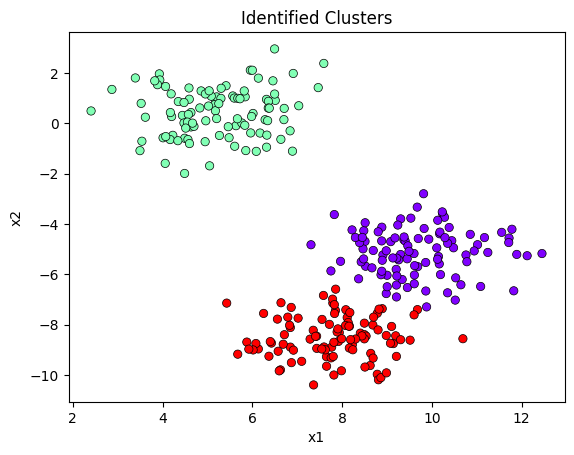

In [ ]:
# Plot the data points and identified clusters
fig, ax = plt.subplots()
ax.scatter(df["x1"], df["x2"], c=df["cluster"], ec="black", lw=0.5, cmap="rainbow")
ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters");

In [ ]:
# Saving the cluster centers as a dataframe for visibility
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
cluster_centers

,x1,x2
0,9.681187,-5.131638
1,5.218327,0.434833
2,7.809865,-8.512772


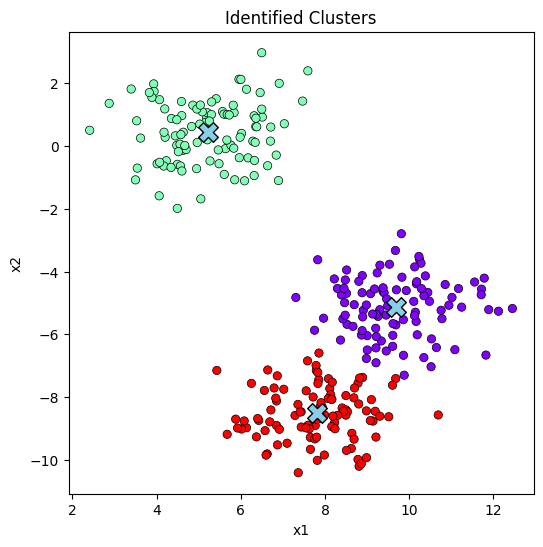

In [ ]:
# Plot the data points and identified clusters
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df["x1"], df["x2"], c=df["cluster"], ec="black", lw=0.5, cmap="rainbow")
ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters")
# Plot the cluster centers
centers = ax.scatter(
    cluster_centers["x1"],
    cluster_centers["x2"],
    color="skyblue",
    ec="black",
    s=200,
    marker="X",
);

In [ ]:
from scipy.spatial.distance import cdist
# Calculate distance to each cluster center
distances = cdist(X, kmeans.cluster_centers_, 'euclidean')

In [ ]:
# Distances shape is (# rows, # clusters)
distances.shape

(300, 3)

In [ ]:
# Compare to X (#rows, # features)
X.shape

(300, 2)

In [ ]:
# Saving distances as a dataframe for convenience
cluter_cols = [f"Distance (Cluster {c})" for  c in range(len(kmeans.cluster_centers_))]
distance_df = pd.DataFrame(distances, columns = cluter_cols)
distance_df.head(3)

,Distance (Cluster 0),Distance (Cluster 1),Distance (Cluster 2)
0,2.763533,8.009963,1.362955
1,4.929960,11.007322,1.760140
2,6.920007,2.457618,9.943477


In [ ]:
# Get the minimum distance to any cluster for each point
min_distances = np.min(distances, axis=1)
# Display first 5 values
min_distances[:5]

array([1.36295536, 1.76013984, 2.45761801, 0.82478221, 1.62635919])

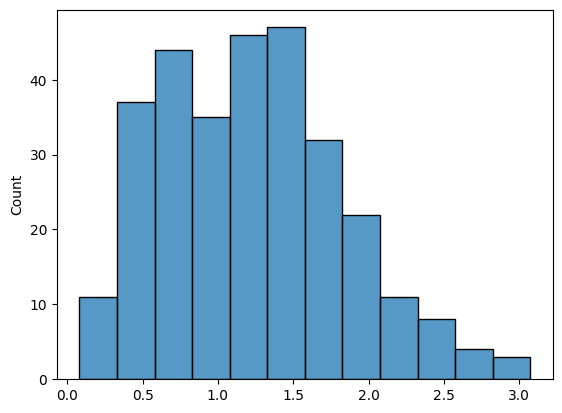

In [ ]:
# distance from closet centroid
ax = sns.histplot(min_distances)

In [ ]:
# Set a threshold based on a percentile
threshold = np.percentile(min_distances, 95)
threshold

2.299876112245027

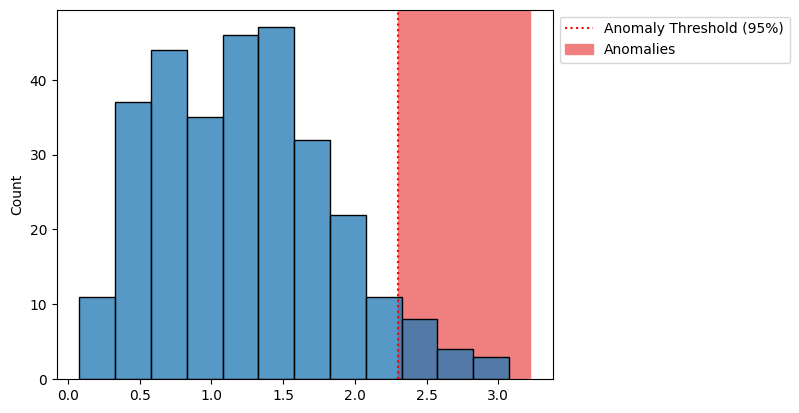

In [ ]:
# Visualize the distribution of distances and the anomaly threshold.
ax = sns.histplot(min_distances)
ax.axvline(threshold, color='red', ls=':', label='Anomaly Threshold (95%)')
ax.axvspan(threshold, ax.get_xlim()[1], color='lightcoral',zorder=0, label='Anomalies')
ax.legend(bbox_to_anchor=[1,1]);

In [ ]:
# Identify anomalies where the distance to closest cluster center is above the threshold
filter_anomalies = min_distances > threshold
# how many were found?
filter_anomalies.sum()

15

In [ ]:
# Getting the row indices of the anomalies
idx_anomalies = X[filter_anomalies].index
idx_anomalies

Index([2, 68, 87, 88, 94, 97, 105, 123, 161, 189, 200, 228, 244, 263, 276], dtype='int64')

In [ ]:
# Slicing the anomalies from X (for demonstration)
X.iloc[idx_anomalies]

,x1,x2
2,7.467731,1.424818
68,11.823414,-6.658463
87,9.814531,-2.796309
88,7.826284,-3.624850
94,5.429257,-7.147623
97,12.452401,-5.176033
105,10.690949,-8.563954
123,7.306840,-4.825578
161,6.495709,2.963979
189,12.122039,-5.262365


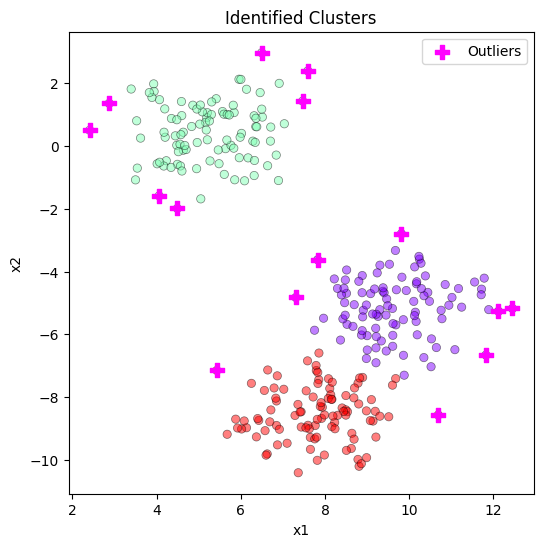

In [ ]:
# Plot the data points and identified clusters
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(
    df["x1"], df["x2"], c=df["cluster"], ec="black", lw=0.5, cmap="rainbow", alpha=0.5
)
ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters")
## Plotting the anomalies for visibility.
X.iloc[idx_anomalies].plot(
    x="x1", y="x2", kind="scatter", color="magenta", label="Outliers", ax=ax, marker='P',s=100,
);

In [ ]:


from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.decomposition import PCA
# Import SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.cluster import KMeans # Import KMeans

set_config(transform_output='pandas')
pd.set_option('display.max_columns', None) # Corrected line

df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/03-Intermediate Machine Learning/project2/adult.csv')
optimal_k = 133

cluster_descriptions = []

# --- Changes start here ---
# Identify categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender']

# Create an OrdinalEncoder instance
encoder = OrdinalEncoder()

# Fit the encoder on the categorical features and transform them
df[categorical_features] = encoder.fit_transform(df[categorical_features])
# --- Changes end here ---

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(df[['age', 'workclass', 'fnlwgt', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']])

# Add the cluster labels to your DataFrame
df['cluster'] = cluster_labels

for i in range(optimal_k):
    cluster_data = df[df['cluster'] == i]
    cluster_desc = {
        'Cluster': i,
        'Avg age': cluster_data['age'].mean(),
        'Avg workclass': cluster_data['workclass'].mean(),
        'Avg fnlwgt': cluster_data['fnlwgt'].mean(),
        'Avg education': cluster_data['education'].mean(),
        'Avg marital-status': cluster_data['marital-status'].mean(),
        'Avg occupation': cluster_data['occupation'].mean(),
        'Avg rlationship': cluster_data['relationship'].mean(),
        'Avg race': cluster_data['race'].mean(),
        'Avg gender': cluster_data['gender'].mean(),
        'Avg capital-gain': cluster_data['capital-gain'].mean(),
        'Avg capital-loss': cluster_data['capital-loss'].mean(),
        'Avg hours-per-week': cluster_data['hours-per-week'].mean(),
    }
    cluster_descriptions.append(cluster_desc)

# Print cluster descriptions
for desc in cluster_descriptions:
    print(desc)

{'Cluster': 0, 'Avg age': 37.58438818565401, 'Avg workclass': 3.8607594936708862, 'Avg fnlwgt': 322388.141350211, 'Avg education': 10.426160337552743, 'Avg marital-status': 2.649789029535865, 'Avg occupation': 6.742616033755274, 'Avg rlationship': 1.358649789029536, 'Avg race': 3.630801687763713, 'Avg gender': 0.7426160337552743, 'Avg capital-gain': 520.3206751054852, 'Avg capital-loss': 89.49367088607595, 'Avg hours-per-week': 40.58016877637131}
{'Cluster': 1, 'Avg age': 40.246171967020025, 'Avg workclass': 3.8244994110718493, 'Avg fnlwgt': 148357.70906949352, 'Avg education': 10.564193168433452, 'Avg marital-status': 2.6230859835100118, 'Avg occupation': 6.400471142520613, 'Avg rlationship': 1.4487632508833923, 'Avg race': 3.618374558303887, 'Avg gender': 0.6501766784452296, 'Avg capital-gain': 238.0494699646643, 'Avg capital-loss': 121.26855123674912, 'Avg hours-per-week': 40.381625441696116}
{'Cluster': 2, 'Avg age': 38.73737373737374, 'Avg workclass': 3.857142857142857, 'Avg fnlwg

Model Accuracy with PCA + Clustering Features: 1.0000
Baseline Model Accuracy: 1.0000


<function matplotlib.pyplot.show(close=None, block=None)>

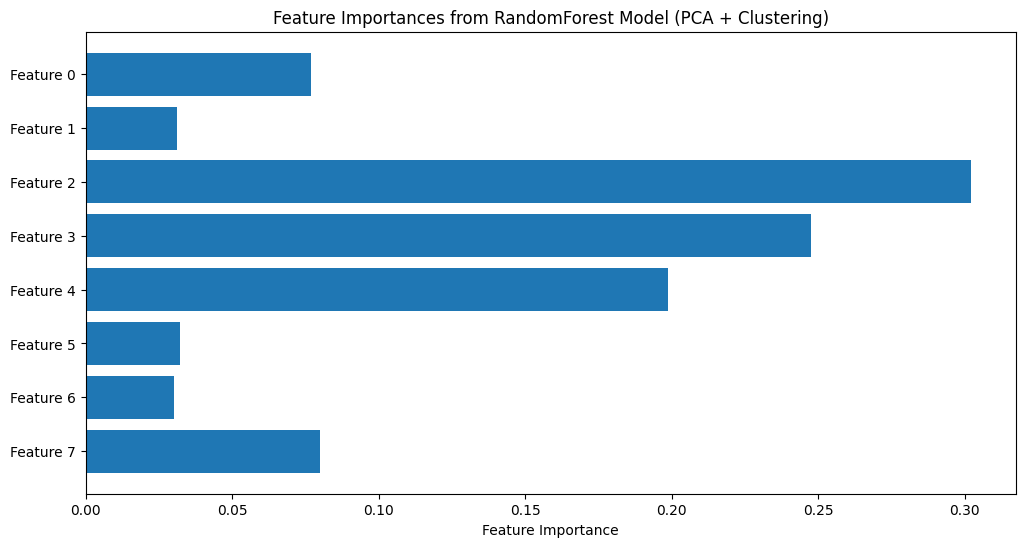

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset (you can replace it with your dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# : Apply PCA to the Data ---
# Fit PCA on training data (to prevent data leakage)
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Concatenate PCA components with the original features
X_train_pca_combined = np.hstack([X_train, X_train_pca])
X_test_pca_combined = np.hstack([X_test, X_test_pca])

#  Apply Clustering (KMeans) ---
# Fit KMeans on the training data (to prevent data leakage)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Use the trained KMeans model to predict cluster labels for both training and test data
X_train_clusters = kmeans.predict(X_train).reshape(-1, 1)  # Make sure it's a column vector
X_test_clusters = kmeans.predict(X_test).reshape(-1, 1)

# Concatenate the cluster labels with the PCA combined data
X_train_final = np.hstack([X_train_pca_combined, X_train_clusters])
X_test_final = np.hstack([X_test_pca_combined, X_test_clusters])

# Train RandomForest Model with New Features ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_final, y_train)

# Evaluate the model on the test data
y_pred = rf.predict(X_test_final)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with PCA + Clustering Features: {accuracy:.4f}")

# Compare with Baseline Model ---
# Train RandomForest on the original data (baseline model)
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
rf_baseline.fit(X_train, y_train)

# Evaluate baseline model
y_pred_baseline = rf_baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")


# Extract importance scores and feature names
importance = results.importances_mean
indices = np.argsort(importance)[::-1]

# Visualize the feature importances
importances = rf.feature_importances_


# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), [f"Feature {i}" for i in range(len(importances))])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from RandomForest Model (PCA + Clustering)')
plt.gca().invert_yaxis()
plt.show

The result above shows that from all 13 faturaes ('age', 'workclass', 'fnlwgt', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week'), the most important 8 are fnlwgt,education, marital-status, age, race,work*class, occupation, rlationship.


Model with PCA Accuracy: 1.0000
Model with RFE-selected Features Accuracy: 1.0000


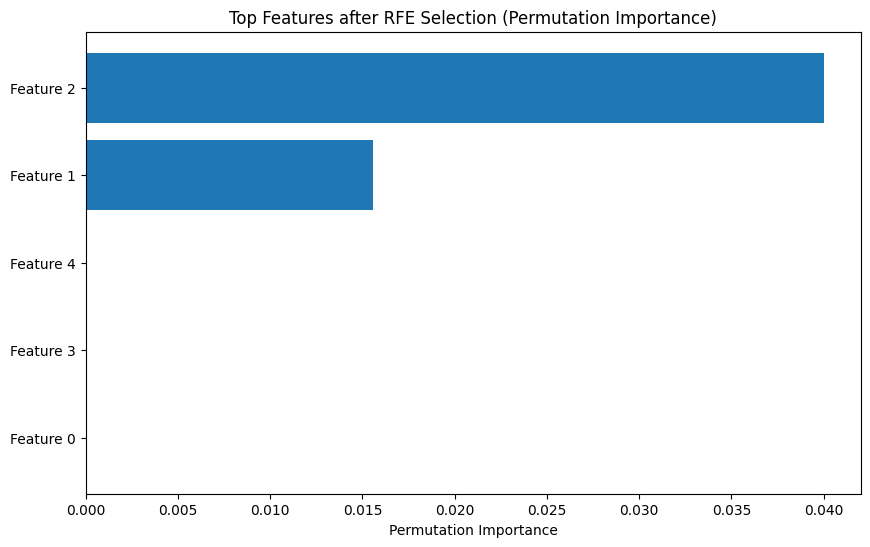

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_iris

# Step 1: Load the Iris dataset (or replace it with your dataset)
data = load_iris()
X = data.data
y = data.target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Apply PCA to the Data ---
# Fit PCA on training data (to prevent data leakage)
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Concatenate PCA components with the original features
X_train_pca_combined = np.hstack([X_train, X_train_pca])
X_test_pca_combined = np.hstack([X_test, X_test_pca])

# --- Train RandomForest Model on PCA Data ---
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca_combined, y_train)

# Evaluate PCA-based model
pca_accuracy = rf_pca.score(X_test_pca_combined, y_test)
print(f"Model with PCA Accuracy: {pca_accuracy:.4f}")

# --- Apply Recursive Feature Elimination (RFE) for Feature Selection ---
# Initialize the RandomForest model for RFE
rf_for_rfe = RandomForestClassifier(n_estimators=100, random_state=42)

# RFE to select the best features (you can adjust the number of features selected)
rfe = RFE(estimator=rf_for_rfe, n_features_to_select=5)  # Select top 5 features
X_train_rfe = rfe.fit_transform(X_train_pca_combined, y_train)
X_test_rfe = rfe.transform(X_test_pca_combined)

# Train RandomForest on selected features
rf_rfe = RandomForestClassifier(n_estimators=100, random_state=42)
rf_rfe.fit(X_train_rfe, y_train)

# Evaluate model with selected features from RFE
rfe_accuracy = rf_rfe.score(X_test_rfe, y_test)
print(f"Model with RFE-selected Features Accuracy: {rfe_accuracy:.4f}")

# --- Permutation Importance on the RFE-selected Model ---
# Compute permutation importance for the final model using RFE-selected features
results = permutation_importance(rf_rfe, X_test_rfe, y_test, n_repeats=10, random_state=42)

# Extract importance scores and feature names
importance = results.importances_mean
indices = np.argsort(importance)[::-1]  # Sort in descending order

# Visualizing the permutation importance of top features
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [f"Feature {i}" for i in indices])
plt.xlabel('Permutation Importance')
plt.title('Top Features after RFE Selection (Permutation Importance)')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()


The result above shows that from the most important 8 are fnlwgt,education, marital-status, age, race,work-class, occupation, rlationship, themost effectivness are: work-class and age.

# **`Comparing the two modules`**

in the two models age is very important to predict the income, but they are differ in the other features in which it is most important in one but in the other it had less important (rlationship in th fist model and work-class in th scond model.